# Penguins Dataset Simple Linear Regression - Fitting Multiple Models

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Load Dataset

In [2]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

#### Display the initial number of rows and columns.

In [3]:
df.shape

(344, 7)

#### Display the initial variable names and their associated data types.

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

#### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df_clean = df.dropna().copy()

In [7]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Display the number of unique values for each column after removing missing data and before initial exploration.

In [8]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

#### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [9]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

#### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [10]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

## Fitting Multiple Models

#### Create plotting function to be used for multiple models.

In [ ]:
def my_coefplot(
    model,
    var,
    xerr_mult=2,
    color='k',
    ecolor='k',
    elinewidth=2,
    ms=10,
    vline=0,
    xlabel='coefficient value',
    title=None,
    figsize=(7, 2.5),
    xlim=None):
    """
    Plots a single coefficient with error bars from a statsmodels model.

    Params:
        model: fitted statsmodels model
        var: variable name (str), e.g. 'Intercept' or 'I(flipper_length_mm ** 2)'
        xerr_mult: multiplier for error bars (default 2)
        color: marker color
        ecolor: error bar color
        elinewidth: error bar line width
        ms: marker size
        vline: where to draw the vertical reference line (default 0)
        xlabel: x-axis label (default 'coefficient value')
        title: figure title (default None, uses variable name)
        figsize: tuple, figure size
        xlim: tuple, x-axis limits (optional, auto if None)
    """
    # Get coefficient and error values
    coef = model.params[var]
    err = xerr_mult * model.bse[var]

    # Create the plot
    _, ax = plt.subplots(figsize=figsize)
    ax.errorbar(
        y = [var],
        x = [coef],
        xerr = [err],
        fmt='o',
        color=color,
        ecolor=ecolor,
        elinewidth=elinewidth,
        ms=ms
    )

    # Add vertical line for reference
    ax.axvline(x=vline, 
               linestyle='--', 
               linewidth=4, 
               color='grey')
    ax.set_xlabel(xlabel)
    if title is None:
        title = f"Coefficient Plot for '{var}'"
    ax.set_title(title)

    # Always include zero in xlim, and add padding around error bar
    bar_left = min(coef - err, vline)
    bar_right = max(coef + err, vline)
    pad = (bar_right - bar_left) * 0.15 if (bar_right - bar_left) > 0 else 1
    auto_xlim = (bar_left - pad, bar_right + pad)

    # Set x-axis limits
    if xlim is not None:
        ax.set_xlim(*xlim)
    else:
        ax.set_xlim(*auto_xlim)

    # Show the plot
    plt.show()

#### The simplest possible linear model is an unknown constant average or intercept only model where we are saying `body_mass_g` is a constant.

In [ ]:
lm_fit_00 = smf.ols(formula='body_mass_g ~ 1', 
                    data=df_clean). \
                    fit()

In [ ]:
lm_fit_00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                nan
Time:                        09:11:44   Log-Likelihood:                -2700.1
No. Observations:                 333   AIC:                             5402.
Df Residuals:                     332   BIC:                             5406.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4207.0571     44.126     95.343      0.000    4120.256    4293.858
==============================================================================
Omnibus:                       30.464   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.874
Skew:                           0.470   Prob(JB):                     4.84e-05
Kurtosis:                       2.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm_fit_00.params

Intercept    4207.057057
dtype: float64

In [ ]:
lm_fit_00.bse

Intercept    44.125554
dtype: float64

In [ ]:
lm_fit_00.conf_int(). \
          rename(columns={0: 'ci_lwr',
                          1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,4120.256133,4293.857981


In [ ]:
lm_fit_00.pvalues

Intercept    2.805040e-243
dtype: float64

In [ ]:
lm_fit_00.pvalues < 0.05

Intercept    True
dtype: bool

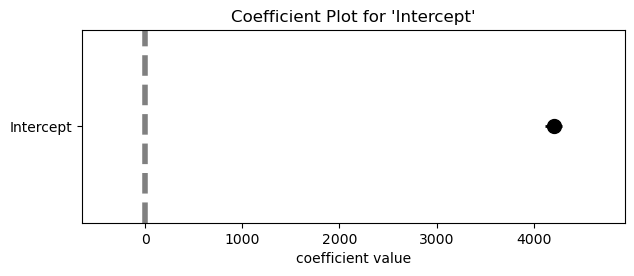

In [ ]:
my_coefplot(lm_fit_00, var='Intercept')

In [ ]:
lm_fit_00.rsquared

4.440892098500626e-16

In [ ]:
np.sqrt((lm_fit_00.resid ** 2).mean())

804.005860159563

#### Our next step is to model the linear relationship or classic best fit line.

In [ ]:
lm_fit_01 = smf.ols(formula='body_mass_g ~ flipper_length_mm', 
                    data=df_clean). \
                    fit()

In [ ]:
lm_fit_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          3.13e-105
Time:                        09:11:44   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_fit_01.params

Intercept           -5872.092683
flipper_length_mm      50.153266
dtype: float64

In [ ]:
lm_fit_01.bse

Intercept            310.285155
flipper_length_mm      1.540231
dtype: float64

In [ ]:
lm_fit_01.conf_int(). \
          rename(columns={0: 'ci_lwr',
                          1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,-6482.472236,-5261.713130
flipper_length_mm,47.123390,53.183142


In [ ]:
lm_fit_01.pvalues

Intercept             1.183941e-54
flipper_length_mm    3.132836e-105
dtype: float64

In [ ]:
lm_fit_01.pvalues < 0.05

Intercept            True
flipper_length_mm    True
dtype: bool

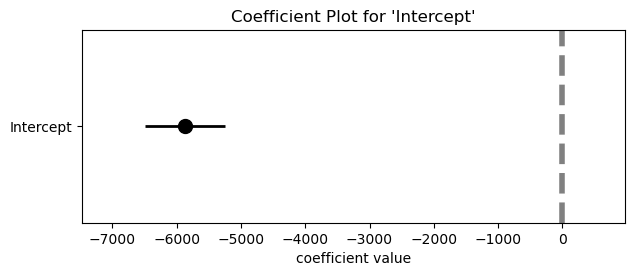

In [ ]:
my_coefplot(lm_fit_01, var='Intercept')

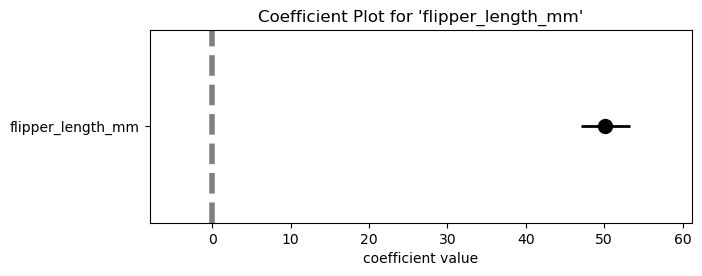

In [ ]:
my_coefplot(lm_fit_01, var='flipper_length_mm')

In [ ]:
lm_fit_01.rsquared

0.7620921573403914

In [ ]:
np.sqrt((lm_fit_01.resid ** 2).mean())

392.16027063806183

#### This model has a lower RMSE so it is doing better than the intercept-only model.

In [ ]:
np.sqrt((lm_fit_01.resid ** 2).mean()) < np.sqrt((lm_fit_00.resid ** 2).mean())

True

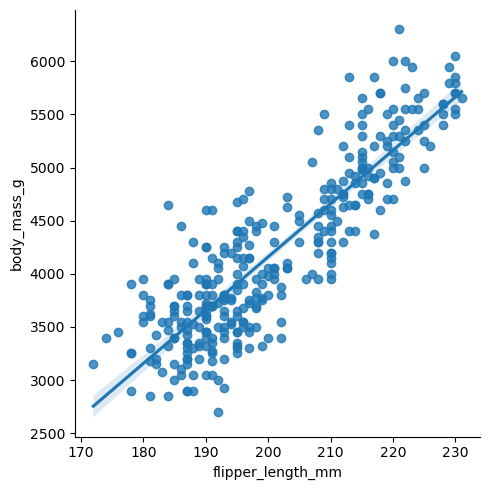

In [ ]:
sns.lmplot(data=df_clean,
           x='flipper_length_mm',
           y='body_mass_g')
plt.show()

#### We will try a second degree polynomial or quadratic model.

In [ ]:
lm_fit_02 = smf.ols(formula='body_mass_g ~ flipper_length_mm + np.power(flipper_length_mm, 2)', 
                    data=df_clean). \
                    fit()

In [ ]:
lm_fit_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     578.5
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          1.34e-108
Time:                        09:11:44   Log-Likelihood:                -2449.5
No. Observations:                 333   AIC:                             4905.
Df Residuals:                     330   BIC:                             4916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.658e+04   4616.247      3.592      0.000    7498.887    2.57e+04
flipper_length_mm               -171.6140     45.524     -3.770      0.000    -261.169     -82.059
np.power(flipper_length_mm, 2)     0.5449      0.112      4.874      0.000       0.325       0.765
==============================================================================
Omnibus:                       10.746   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.985
Skew:                           0.441   Prob(JB):                      0.00412
Kurtosis:                       3.119   Cond. No.                     9.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_fit_02.params

Intercept                         16579.869215
flipper_length_mm                  -171.613976
np.power(flipper_length_mm, 2)        0.544948
dtype: float64

In [ ]:
lm_fit_02.bse

Intercept                         4616.246647
flipper_length_mm                   45.524470
np.power(flipper_length_mm, 2)       0.111807
dtype: float64

In [ ]:
lm_fit_02.conf_int(). \
          rename(columns={0: 'ci_lwr',
                          1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,7498.887253,25660.851176
flipper_length_mm,-261.168743,-82.059210
"np.power(flipper_length_mm, 2)",0.325003,0.764892


In [ ]:
lm_fit_02.pvalues

Intercept                         0.000379
flipper_length_mm                 0.000194
np.power(flipper_length_mm, 2)    0.000002
dtype: float64

In [ ]:
lm_fit_02.pvalues < 0.05

Intercept                         True
flipper_length_mm                 True
np.power(flipper_length_mm, 2)    True
dtype: bool

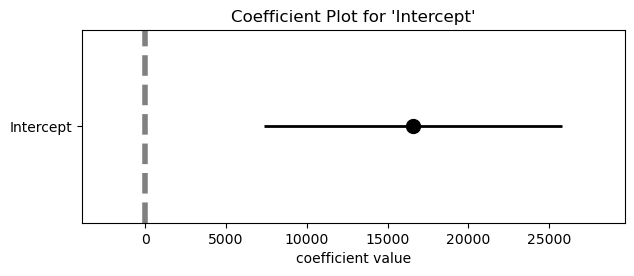

In [ ]:
my_coefplot(lm_fit_02, var='Intercept')

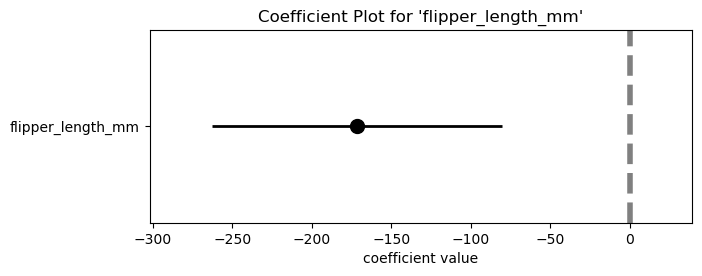

In [ ]:
my_coefplot(lm_fit_02, var='flipper_length_mm')

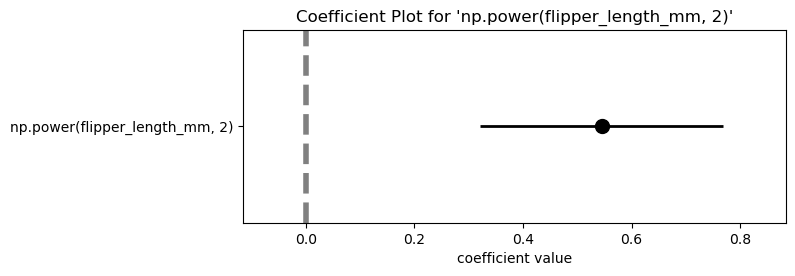

In [ ]:
my_coefplot(lm_fit_02, var='np.power(flipper_length_mm, 2)')

In [ ]:
lm_fit_02.rsquared

0.7780684324476418

In [ ]:
np.sqrt((lm_fit_02.resid ** 2).mean())

378.7640525050107

#### This model has a lower RMSE than the other two so it is doing better.

In [ ]:
np.sqrt((lm_fit_02.resid ** 2).mean()) < np.sqrt((lm_fit_00.resid ** 2).mean())

True

In [ ]:
np.sqrt((lm_fit_02.resid ** 2).mean()) < np.sqrt((lm_fit_01.resid ** 2).mean())

True

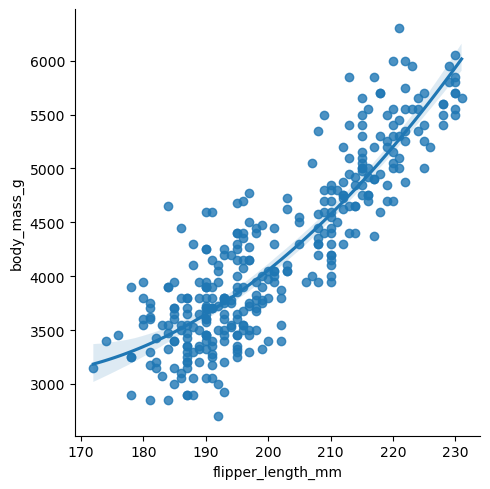

In [ ]:
sns.lmplot(data=df_clean,
           x='flipper_length_mm',
           y='body_mass_g',
           order=2)
plt.show()

#### We will review a cubic model.

In [ ]:
lm_fit_03 = smf.ols(formula='body_mass_g ~ flipper_length_mm + np.power(flipper_length_mm, 2) + np.power(flipper_length_mm, 3)', 
                    data=df_clean). \
                    fit()

In [ ]:
lm_fit_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     397.5
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          5.07e-109
Time:                        09:11:44   Log-Likelihood:                -2445.2
No. Observations:                 333   AIC:                             4898.
Df Residuals:                     329   BIC:                             4914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.795e+05   5.55e+04      3.232      0.001    7.02e+04    2.89e+05
flipper_length_mm              -2591.3912    823.371     -3.147      0.002   -4211.126    -971.656
np.power(flipper_length_mm, 2)    12.4909      4.060      3.076      0.002       4.504      20.478
np.power(flipper_length_mm, 3)    -0.0196      0.007     -2.943      0.003      -0.033      -0.006
==============================================================================
Omnibus:                       11.383   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.688
Skew:                           0.454   Prob(JB):                      0.00290
Kurtosis:                       3.130   Cond. No.                     2.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_fit_03.params

Intercept                         179467.306901
flipper_length_mm                  -2591.391180
np.power(flipper_length_mm, 2)        12.490930
np.power(flipper_length_mm, 3)        -0.019598
dtype: float64

In [ ]:
lm_fit_03.bse

Intercept                         55530.217107
flipper_length_mm                   823.370574
np.power(flipper_length_mm, 2)        4.060253
np.power(flipper_length_mm, 3)        0.006659
dtype: float64

In [ ]:
lm_fit_03.conf_int(). \
          rename(columns={0: 'ci_lwr',
                          1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,70228.225861,288706.387940
flipper_length_mm,-4211.126337,-971.656024
"np.power(flipper_length_mm, 2)",4.503598,20.478261
"np.power(flipper_length_mm, 3)",-0.032697,-0.006499


In [ ]:
lm_fit_03.pvalues

Intercept                         0.001354
flipper_length_mm                 0.001799
np.power(flipper_length_mm, 2)    0.002271
np.power(flipper_length_mm, 3)    0.003478
dtype: float64

In [ ]:
lm_fit_03.pvalues < 0.05

Intercept                         True
flipper_length_mm                 True
np.power(flipper_length_mm, 2)    True
np.power(flipper_length_mm, 3)    True
dtype: bool

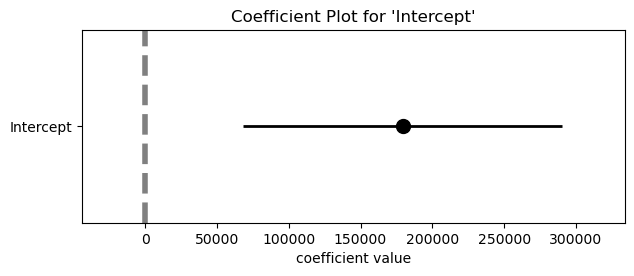

In [ ]:
my_coefplot(lm_fit_03, var='Intercept')

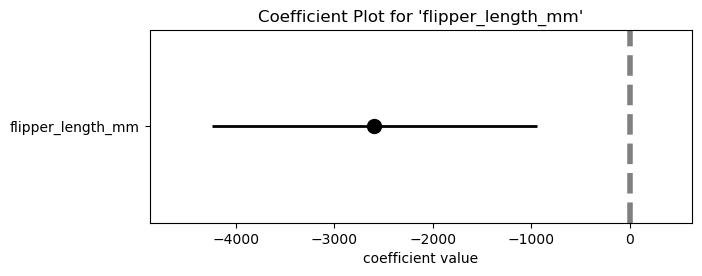

In [ ]:
my_coefplot(lm_fit_03, var='flipper_length_mm')

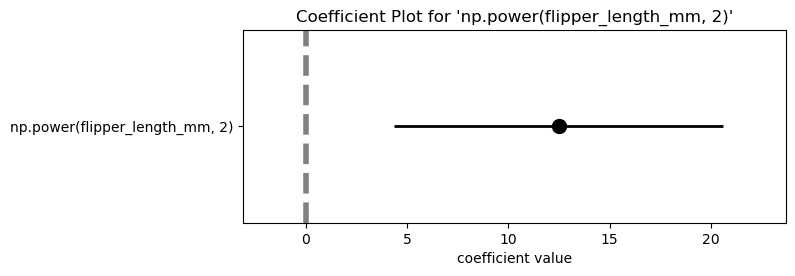

In [ ]:
my_coefplot(lm_fit_03, var='np.power(flipper_length_mm, 2)')

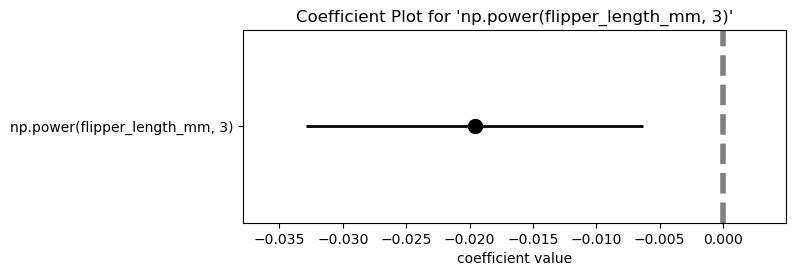

In [ ]:
my_coefplot(lm_fit_03, var='np.power(flipper_length_mm, 3)')

In [ ]:
lm_fit_03.rsquared

0.783762142815277

#### This model has a lower RMSE than the other three so it is doing best so far.

In [ ]:
np.sqrt((lm_fit_03.resid ** 2).mean()) < np.sqrt((lm_fit_00.resid ** 2).mean()) 

True

In [ ]:
np.sqrt((lm_fit_03.resid ** 2).mean()) < np.sqrt((lm_fit_01.resid ** 2).mean()) 

True

In [ ]:
np.sqrt((lm_fit_03.resid ** 2).mean()) < np.sqrt((lm_fit_02.resid ** 2).mean())

True

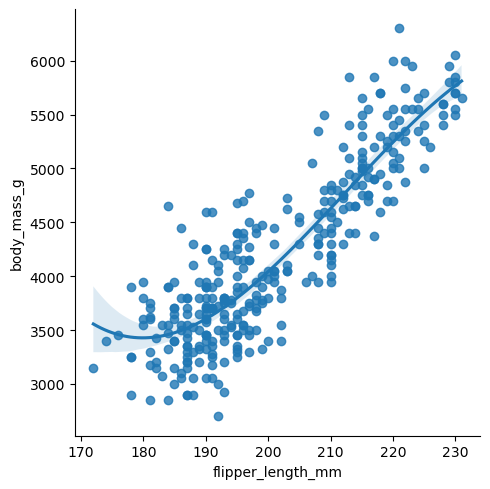

In [ ]:
sns.lmplot(data=df_clean,
           x='flipper_length_mm',
           y='body_mass_g',
           order=3)
plt.show()